In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data0 = pd.read_csv("C:\\Users\\spurt\\Downloads\\Summer Internship - Phishing detection\\phishing.csv")

In [3]:
data0

,Index,UsingIP,LongURL,ShortURL,Symbol@,Redirecting//,PrefixSuffix-,SubDomains,HTTPS,DomainRegLen,...,UsingPopupWindow,IframeRedirection,AgeofDomain,DNSRecording,WebsiteTraffic,PageRank,GoogleIndex,LinksPointingToPage,StatsReport,class
0,0,1,1,1,1,1,-1,0,1,-1,...,1,1,-1,-1,0,-1,1,1,1,-1
1,1,1,0,1,1,1,-1,-1,-1,-1,...,1,1,1,-1,1,-1,1,0,-1,-1
2,2,1,0,1,1,1,-1,-1,-1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
3,3,1,0,-1,1,1,-1,1,1,-1,...,-1,1,-1,-1,0,-1,1,1,1,1
4,4,-1,0,-1,1,-1,-1,1,1,-1,...,1,1,1,1,1,-1,1,-1,-1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11049,11049,1,-1,1,-1,1,1,1,1,-1,...,-1,-1,1,1,-1,-1,1,1,1,1
11050,11050,-1,1,1,-1,-1,-1,1,-1,-1,...,-1,1,1,1,1,1,1,-1,1,-1
11051,11051,1,-1,1,1,1,-1,1,-1,-1,...,1,1,1,1,1,-1,1,0,1,-1
11052,11052,-1,-1,1,1,1,-1,-1,-1,1,...,-1,1,1,1,1,-1,1,1,1,-1


In [4]:
#Checking the shape of the dataset
data0.shape

(11054, 32)

In [5]:
#Listing the features of the dataset
data0.columns
    

Index(['Index', 'UsingIP', 'LongURL', 'ShortURL', 'Symbol@', 'Redirecting//',
       'PrefixSuffix-', 'SubDomains', 'HTTPS', 'DomainRegLen', 'Favicon',
       'NonStdPort', 'HTTPSDomainURL', 'RequestURL', 'AnchorURL',
       'LinksInScriptTags', 'ServerFormHandler', 'InfoEmail', 'AbnormalURL',
       'WebsiteForwarding', 'StatusBarCust', 'DisableRightClick',
       'UsingPopupWindow', 'IframeRedirection', 'AgeofDomain', 'DNSRecording',
       'WebsiteTraffic', 'PageRank', 'GoogleIndex', 'LinksPointingToPage',
       'StatsReport', 'class'],
      dtype='object')

In [6]:
data0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11054 entries, 0 to 11053
Data columns (total 32 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Index                11054 non-null  int64
 1   UsingIP              11054 non-null  int64
 2   LongURL              11054 non-null  int64
 3   ShortURL             11054 non-null  int64
 4   Symbol@              11054 non-null  int64
 5   Redirecting//        11054 non-null  int64
 6   PrefixSuffix-        11054 non-null  int64
 7   SubDomains           11054 non-null  int64
 8   HTTPS                11054 non-null  int64
 9   DomainRegLen         11054 non-null  int64
 10  Favicon              11054 non-null  int64
 11  NonStdPort           11054 non-null  int64
 12  HTTPSDomainURL       11054 non-null  int64
 13  RequestURL           11054 non-null  int64
 14  AnchorURL            11054 non-null  int64
 15  LinksInScriptTags    11054 non-null  int64
 16  ServerFormHandler    1

In [7]:
# nunique value in columns

data0.nunique()

Index                  11054
UsingIP                    2
LongURL                    3
ShortURL                   2
Symbol@                    2
Redirecting//              2
PrefixSuffix-              2
SubDomains                 3
HTTPS                      3
DomainRegLen               2
Favicon                    2
NonStdPort                 2
HTTPSDomainURL             2
RequestURL                 2
AnchorURL                  3
LinksInScriptTags          3
ServerFormHandler          3
InfoEmail                  2
AbnormalURL                2
WebsiteForwarding          2
StatusBarCust              2
DisableRightClick          2
UsingPopupWindow           2
IframeRedirection          2
AgeofDomain                2
DNSRecording               2
WebsiteTraffic             3
PageRank                   2
GoogleIndex                2
LinksPointingToPage        3
StatsReport                2
class                      2
dtype: int64

In [8]:
#droping index column

data0 = data0.drop(['Index'],axis = 1)

In [9]:
#description of dataset

data0.describe().T

,count,mean,std,min,25%,50%,75%,max
UsingIP,11054.0,0.313914,0.949495,-1.0,-1.0,1.0,1.0,1.0
LongURL,11054.0,-0.633345,0.765973,-1.0,-1.0,-1.0,-1.0,1.0
ShortURL,11054.0,0.738737,0.674024,-1.0,1.0,1.0,1.0,1.0
Symbol@,11054.0,0.700561,0.713625,-1.0,1.0,1.0,1.0,1.0
Redirecting//,11054.0,0.741632,0.670837,-1.0,1.0,1.0,1.0,1.0
PrefixSuffix-,11054.0,-0.734938,0.678165,-1.0,-1.0,-1.0,-1.0,1.0
SubDomains,11054.0,0.064049,0.817492,-1.0,-1.0,0.0,1.0,1.0
HTTPS,11054.0,0.251040,0.911856,-1.0,-1.0,1.0,1.0,1.0
DomainRegLen,11054.0,-0.336711,0.941651,-1.0,-1.0,-1.0,1.0,1.0
Favicon,11054.0,0.628551,0.777804,-1.0,1.0,1.0,1.0,1.0


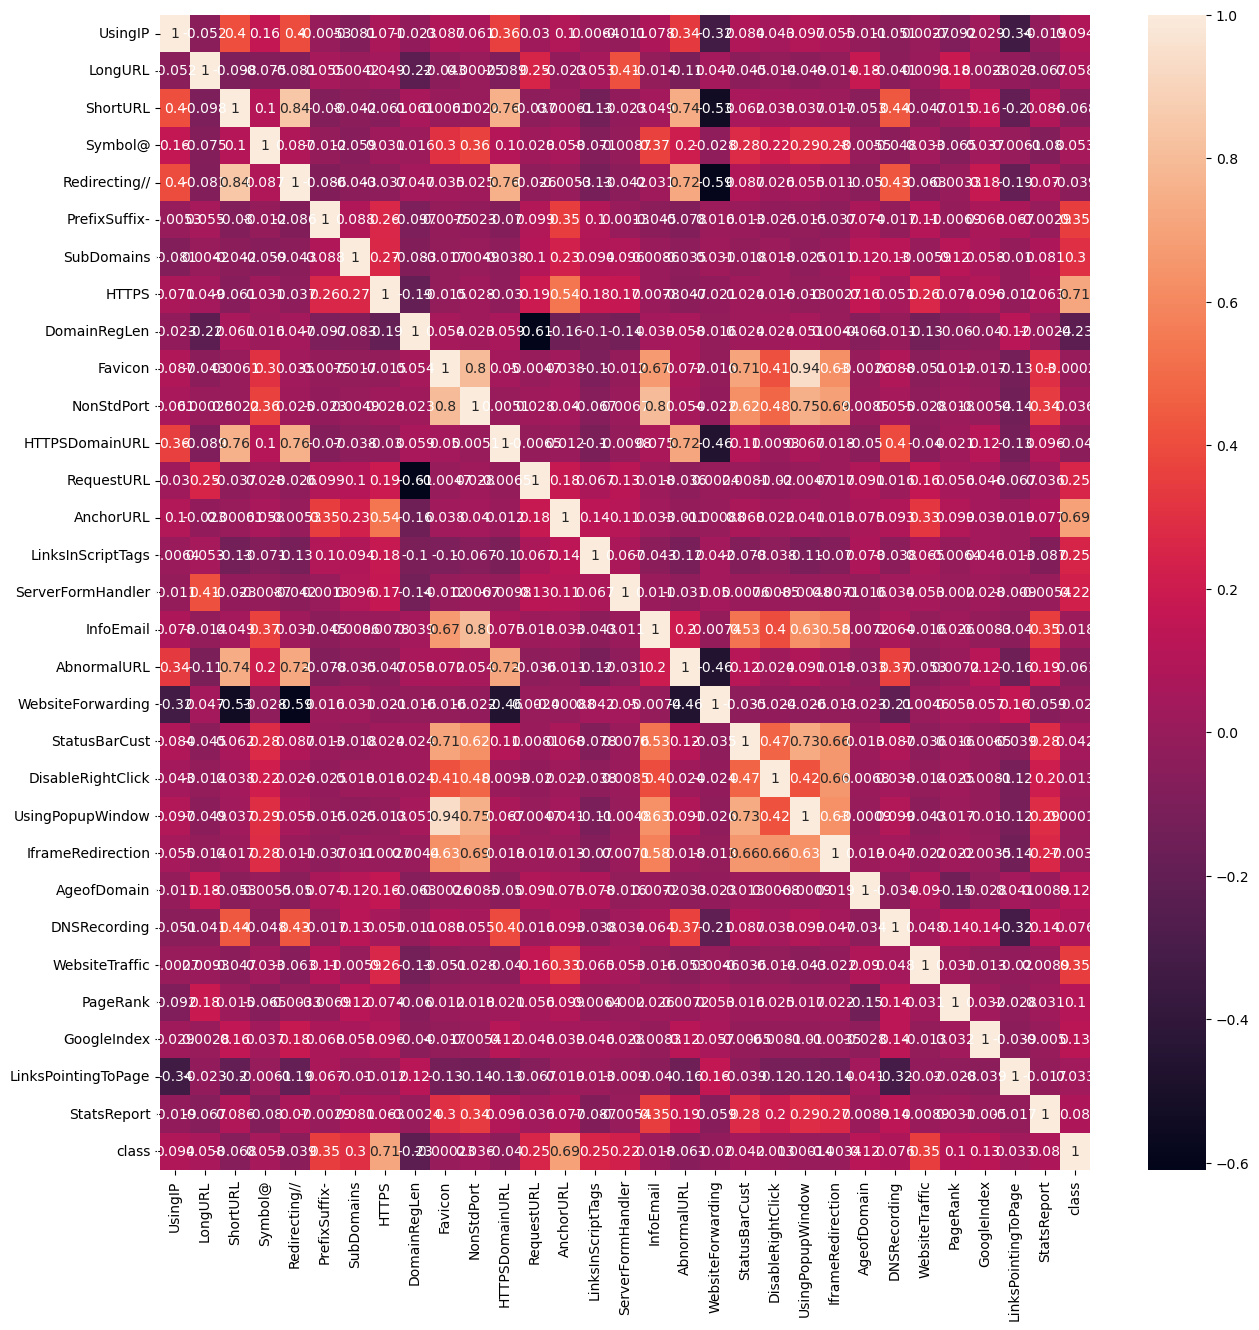

In [10]:
#Correlation heatmap
plt.figure(figsize=(15,15))
sns.heatmap(data0.corr(), annot=True)
plt.show()

C:\Users\spurt\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


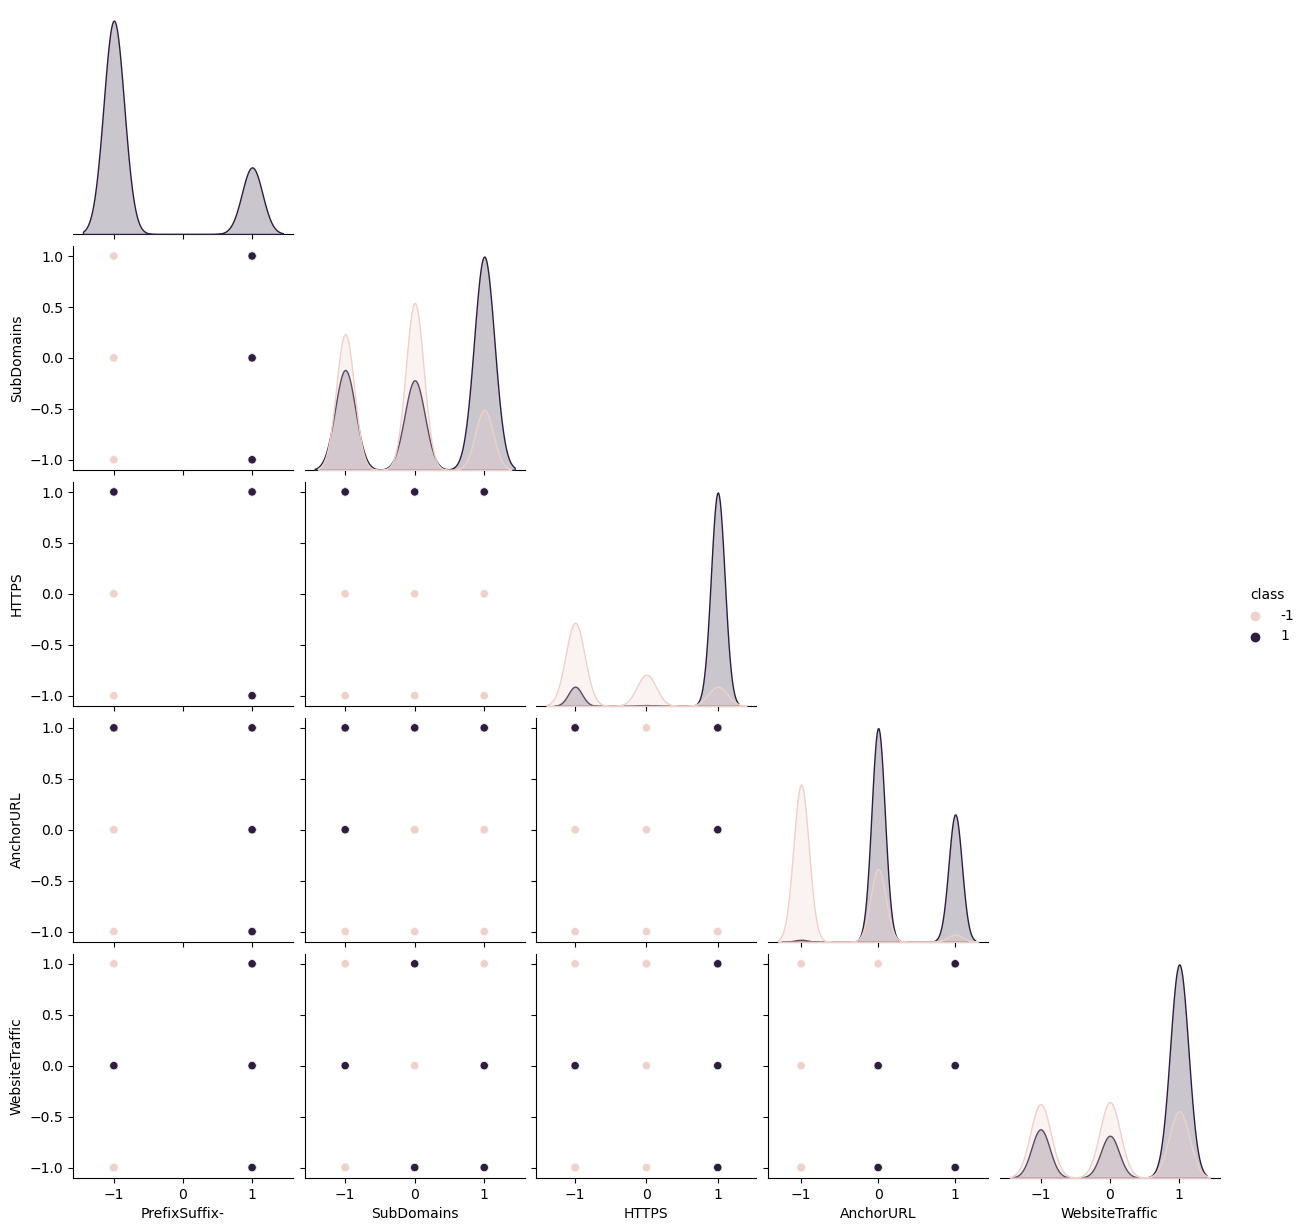

In [11]:

#pairplot for particular features

df = data0[['PrefixSuffix-', 'SubDomains', 'HTTPS','AnchorURL','WebsiteTraffic','class']]
sns.pairplot(data = df,hue="class",corner=True);

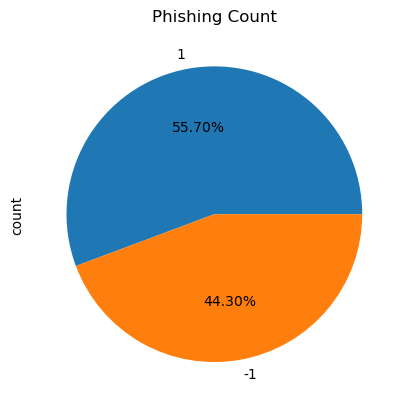

In [12]:
# Phishing Count in pie chart

data0['class'].value_counts().plot(kind='pie',autopct='%1.2f%%')
plt.title("Phishing Count")
plt.show()

In [13]:
# Splitting the dataset into dependant and independant fetature

X = data0.drop(["class"],axis =1)
y = data0["class"]

In [14]:
# Replace this line in your code where you calculate the correlation matrix
corr_matrix = data0.corr()

# With this line
corr_matrix = data0.corr(numeric_only=True)


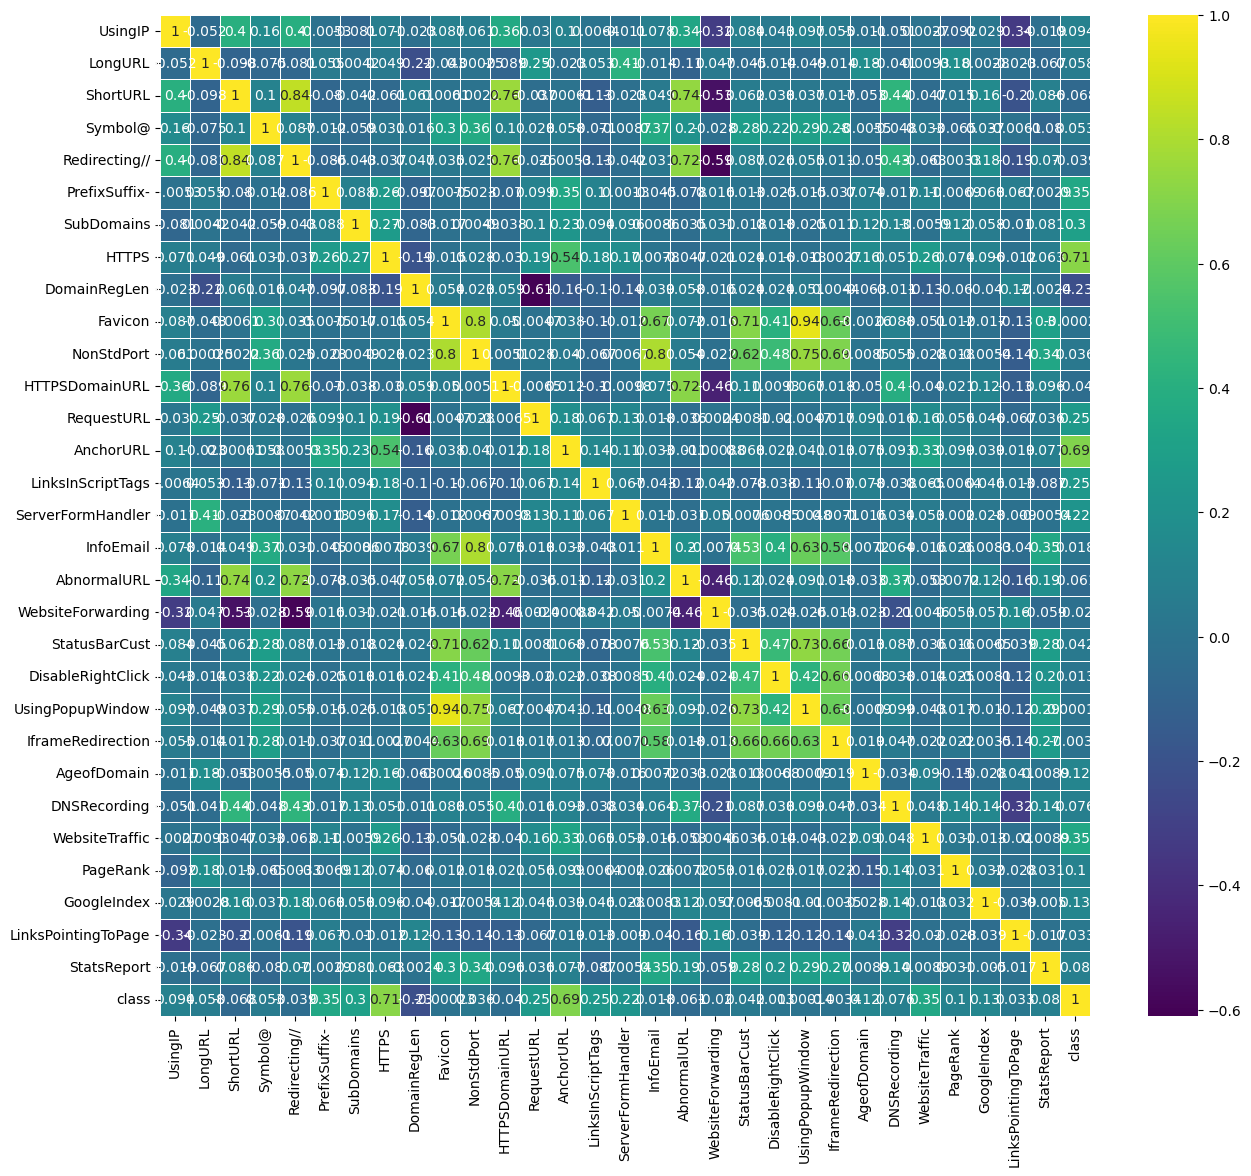

In [15]:
#Correlation heatmap
plt.figure(figsize=(15,13))
color = plt.get_cmap('viridis').copy()   # default color
color.set_bad('lightblue') 
sns.heatmap(corr_matrix, annot=True, linewidth=0.4,cmap=color)
plt.show()

In [16]:
corr_matrix.shape

(31, 31)

In [17]:
corr_matrix['class']

UsingIP                0.094033
LongURL                0.057661
ShortURL              -0.067931
Symbol@                0.052994
Redirecting//         -0.038885
PrefixSuffix-          0.348588
SubDomains             0.298231
HTTPS                  0.714704
DomainRegLen          -0.225879
Favicon               -0.000231
NonStdPort             0.036461
HTTPSDomainURL        -0.040096
RequestURL             0.253478
AnchorURL              0.692895
LinksInScriptTags      0.248415
ServerFormHandler      0.221380
InfoEmail              0.018039
AbnormalURL           -0.060751
WebsiteForwarding     -0.020151
StatusBarCust          0.041878
DisableRightClick      0.012675
UsingPopupWindow       0.000136
IframeRedirection     -0.003362
AgeofDomain            0.121402
DNSRecording           0.075579
WebsiteTraffic         0.346003
PageRank               0.104593
GoogleIndex            0.129000
LinksPointingToPage    0.032694
StatsReport            0.079632
class                  1.000000
Name: cl

In [18]:
status_corr = corr_matrix['class']
status_corr.shape

(31,)

In [19]:
# Splitting the dataset into train and test sets: 80-20 split
from sklearn.model_selection import train_test_split

X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size = 0.2, random_state = 12)

In [20]:
# check the shape of X_train, X_test, y_train and y_test
print('X_train shape: ', X_train1.shape)
print('X_test shape: ', X_test1.shape)
print('y_train shape: ', y_train1.shape)
print('y_test shape: ', y_test1.shape)

X_train shape:  (8843, 30)
X_test shape:  (2211, 30)
y_train shape:  (8843,)
y_test shape:  (2211,)


In [21]:
from sklearn.tree import DecisionTreeClassifier
# Instantiate the model
DT_model = DecisionTreeClassifier(max_depth=3)

# Fit the model to the training set
DT_model.fit(X_train1, y_train1)

DecisionTreeClassifier(max_depth=3)

In [22]:
y_pred = DT_model.predict(X_test1)
     

In [23]:
from sklearn.metrics import accuracy_score

# Assuming y_pred is your model's predictions on the test set
print('Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test1, y_pred)))


Model accuracy score: 0.9032


In [24]:
# print the scores on training and test set
print('Training set score: {:.4f}'.format(DT_model.score(X_train1, y_train1)))
print('Test set score: {:.4f}'.format(DT_model.score(X_test1, y_test1)))

Training set score: 0.9091
Test set score: 0.9032


In [25]:
from sklearn.model_selection import KFold

# Instantiate KFold with the desired number of splits
kf = KFold(n_splits=10, shuffle=False)


In [26]:
from sklearn.model_selection import cross_val_score

# Assuming DT_model is your Decision Tree model
score = cross_val_score(DT_model, X_train1, y_train1, cv=kf, scoring='accuracy')
DT_model_cv_score = score.mean()
DT_model_cv_stdev = score.std()
print('Cross Validation Accuracy scores are:\n {}'.format(score))

Cross Validation Accuracy scores are:
 [0.90847458 0.90508475 0.91186441 0.91855204 0.91289593 0.90045249
 0.90723982 0.90723982 0.90271493 0.91628959]


In [27]:
Accuracy  = ['Cross Validation Accuracy ']
DT_A = pd.DataFrame({'CV Mean':DT_model_cv_score,'Std':DT_model_cv_stdev},index=Accuracy )
DT_A


,CV Mean,Std
Cross Validation Accuracy,0.909081,0.005496


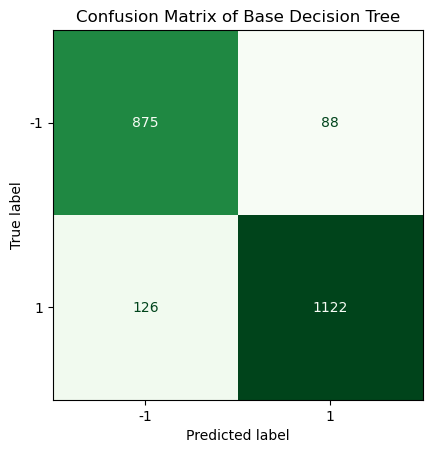

In [28]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(DT_model, X_test1, y_test1, colorbar=False, cmap='Greens')
plt.title('Confusion Matrix of Base Decision Tree')
plt.grid(False)

In [29]:
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score

# Assuming y_pred is your predictions on the test set
print(classification_report(y_test1, y_pred))


              precision    recall  f1-score   support

          -1       0.87      0.91      0.89       963
           1       0.93      0.90      0.91      1248

    accuracy                           0.90      2211
   macro avg       0.90      0.90      0.90      2211
weighted avg       0.90      0.90      0.90      2211



In [30]:
def metrics_calculator(y_test, y_pred, model_name):
    '''
    This function calculates all desired performance metrics for a given model.
    '''
    result = pd.DataFrame(data=[accuracy_score(y_test, y_pred),
                                precision_score(y_test, y_pred, average='macro'),
                                recall_score(y_test, y_pred, average='macro'),
                                f1_score(y_test, y_pred, average='macro')],
                          index=['Accuracy','Precision','Recall','F1-score'],
                          columns = [model_name])
    return result

In [31]:
BaseDT_result = metrics_calculator(y_test1, y_pred, 'Base Decision Tree')
BaseDT_result

,Base Decision Tree
Accuracy,0.903211
Precision,0.900699
Recall,0.903829
F1-score,0.901988


In [32]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt


C:\Users\spurt\anaconda3\Lib\site-packages\sklearn\metrics\_ranking.py:1132: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


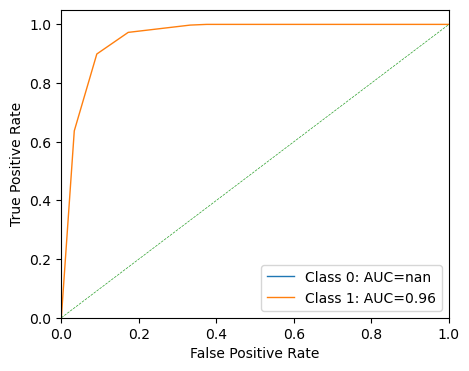

In [33]:
y_Pred_prob = DT_model.predict_proba(X_test1)

def roc_curve_plot(y_actual, y_predicted_probs, figsize=(5, 4), title=None, legend_loc='best'):

    # Compute ROC curve and ROC area for each class
    fpr = {}
    tpr = {}
    thres = {}
    roc_auc = {}

    n_class = y_predicted_probs.shape[1]
    for i in range(n_class):
        fpr[i], tpr[i], thres[i] = roc_curve(y_actual == i, y_predicted_probs[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Create a figure and plot the ROC curve for each class
    plt.figure(figsize=figsize)
    for i in range(n_class):
        plt.plot(fpr[i], tpr[i], linewidth=1, label='Class {}: AUC={:.2f}'.format(i, roc_auc[i]))

    # Add diagonal line and axis labels
    plt.plot([0, 1], [0, 1], '--', linewidth=0.5)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

    # Set axis limits and add title and legend
    plt.xlim([0, 1])
    plt.ylim([0, 1.05])
    if title is not None:
        plt.title(title)
    plt.legend(loc=legend_loc)

    # Show the plot
    plt.show()
        
roc_curve_plot(y_test1, y_Pred_prob)

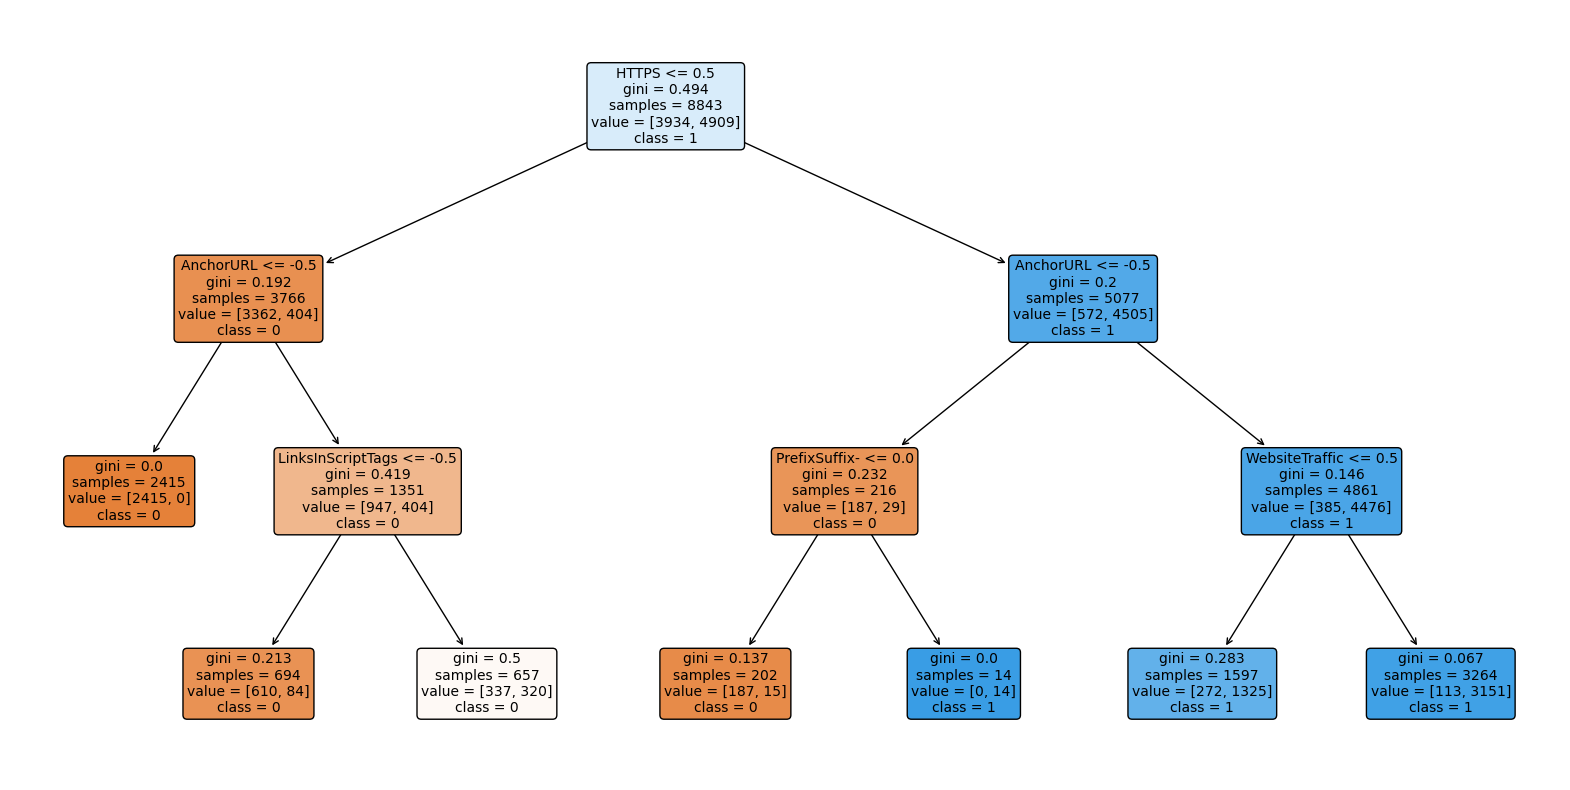

In [34]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Assuming DT_model is your Decision Tree model
feature_names = list(X.columns)
target_names = ["0", "1", "2", "3"]

# Create a figure and plot the decision tree
plt.figure(figsize=(20, 10))
plot_tree(DT_model, filled=True, feature_names=feature_names, class_names=target_names, rounded=True, fontsize=10)

# Display the plot
plt.show()


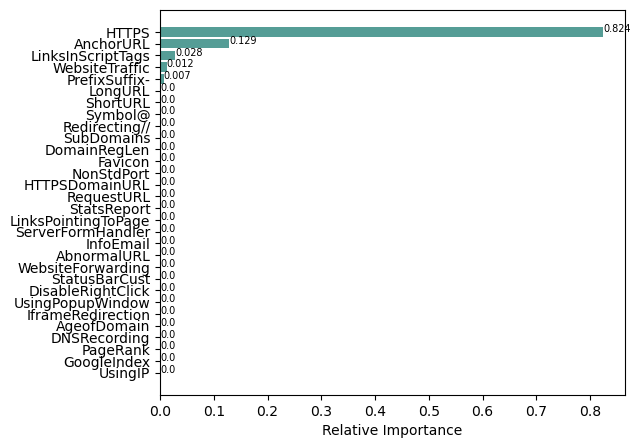

In [35]:
# Get feature importances from the Random Forest model
importances = DT_model.feature_importances_

# Sort the features by importance
indices = np.argsort(importances)

# Create a horizontal bar plot of the feature importances
plt.figure(figsize=(6, 5))
plt.barh(range(len(indices)), importances[indices], color='#559d96', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')

# Add labels to the bars
for i, v in enumerate(importances[indices]):
    plt.text(v, i, str(round(v, 3)), color='black', fontsize= 7)

plt.show()

In [36]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Finding optimal hyperparameters(GridSearchCV)

# Define model
model = DecisionTreeClassifier()

# Define evaluation
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=0)

# Define search parameters
max_depth = range(2, 19, 1)
criterion = ['entropy', 'gini']   

#min_samples_split = [2, 3, 4]
#min_samples_leaf = [1, 2, 3]

param_grid = {'max_depth': max_depth, 'criterion':criterion}

# Define search
search = GridSearchCV(model, param_grid, scoring='accuracy', n_jobs=-1, cv=cv)

# Execute search
GridSearchCV = search.fit(X_train1, y_train1)

# Set the clf to the best combination of parameters
DT_modelcv = GridSearchCV.best_estimator_

# Summarize result
print('Best Score: %s' % GridSearchCV.best_score_)
print('Best Hyperparameters: %s' % GridSearchCV.best_params_)

Best Score: 0.9600817632572369
Best Hyperparameters: {'criterion': 'entropy', 'max_depth': 18}


In [37]:
DT_modelcv.fit(X_train1, y_train1)

DecisionTreeClassifier(criterion='entropy', max_depth=18)

In [38]:
y_pred = DT_modelcv.predict(X_test1)

In [39]:
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test1, y_pred)))

Model accuracy score: 0.9584


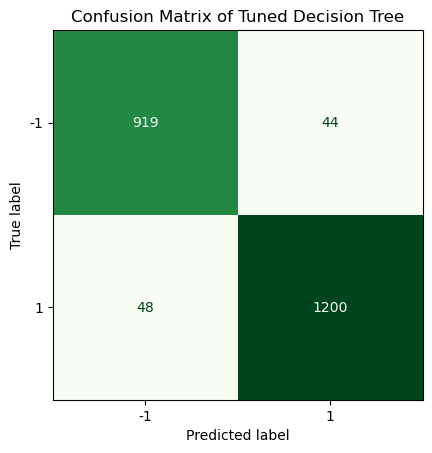

In [40]:
ConfusionMatrixDisplay.from_estimator(DT_modelcv, X_test1, y_test1, colorbar=False, cmap='Greens')
plt.title('Confusion Matrix of Tuned Decision Tree')
plt.grid(False)

In [41]:
print(classification_report(y_test1, y_pred))

              precision    recall  f1-score   support

          -1       0.95      0.95      0.95       963
           1       0.96      0.96      0.96      1248

    accuracy                           0.96      2211
   macro avg       0.96      0.96      0.96      2211
weighted avg       0.96      0.96      0.96      2211



In [42]:
TunedDT_result = metrics_calculator(y_test1, y_pred, 'Tuned Decision Tree')
TunedDT_result

,Tuned Decision Tree
Accuracy,0.958390
Precision,0.957496
Recall,0.957924
F1-score,0.957707


C:\Users\spurt\anaconda3\Lib\site-packages\sklearn\metrics\_ranking.py:1132: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


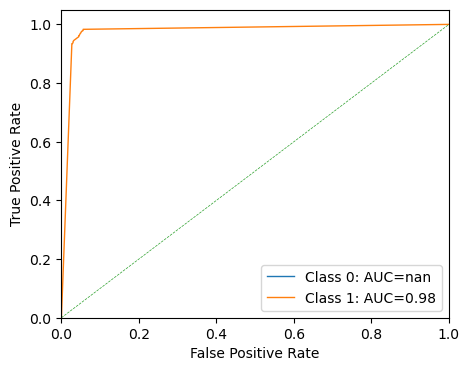

In [43]:
y_Pred_prob = DT_modelcv.predict_proba(X_test1)

def roc_curve_plot(y_actual, y_predicted_probs, figsize=(5, 4), title=None, legend_loc='best'):

    # Compute ROC curve and ROC area for each class
    fpr = {}
    tpr = {}
    thres = {}
    roc_auc = {}

    n_class = y_predicted_probs.shape[1]
    for i in range(n_class):
        fpr[i], tpr[i], thres[i] = roc_curve(y_actual == i, y_predicted_probs[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Create a figure and plot the ROC curve for each class
    plt.figure(figsize=figsize)
    for i in range(n_class):
        plt.plot(fpr[i], tpr[i], linewidth=1, label='Class {}: AUC={:.2f}'.format(i, roc_auc[i]))

    # Add diagonal line and axis labels
    plt.plot([0, 1], [0, 1], '--', linewidth=0.5)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

    # Set axis limits and add title and legend
    plt.xlim([0, 1])
    plt.ylim([0, 1.05])
    if title is not None:
        plt.title(title)
    plt.legend(loc=legend_loc)

    # Show the plot
    plt.show()
        
roc_curve_plot(y_test1, y_Pred_prob)

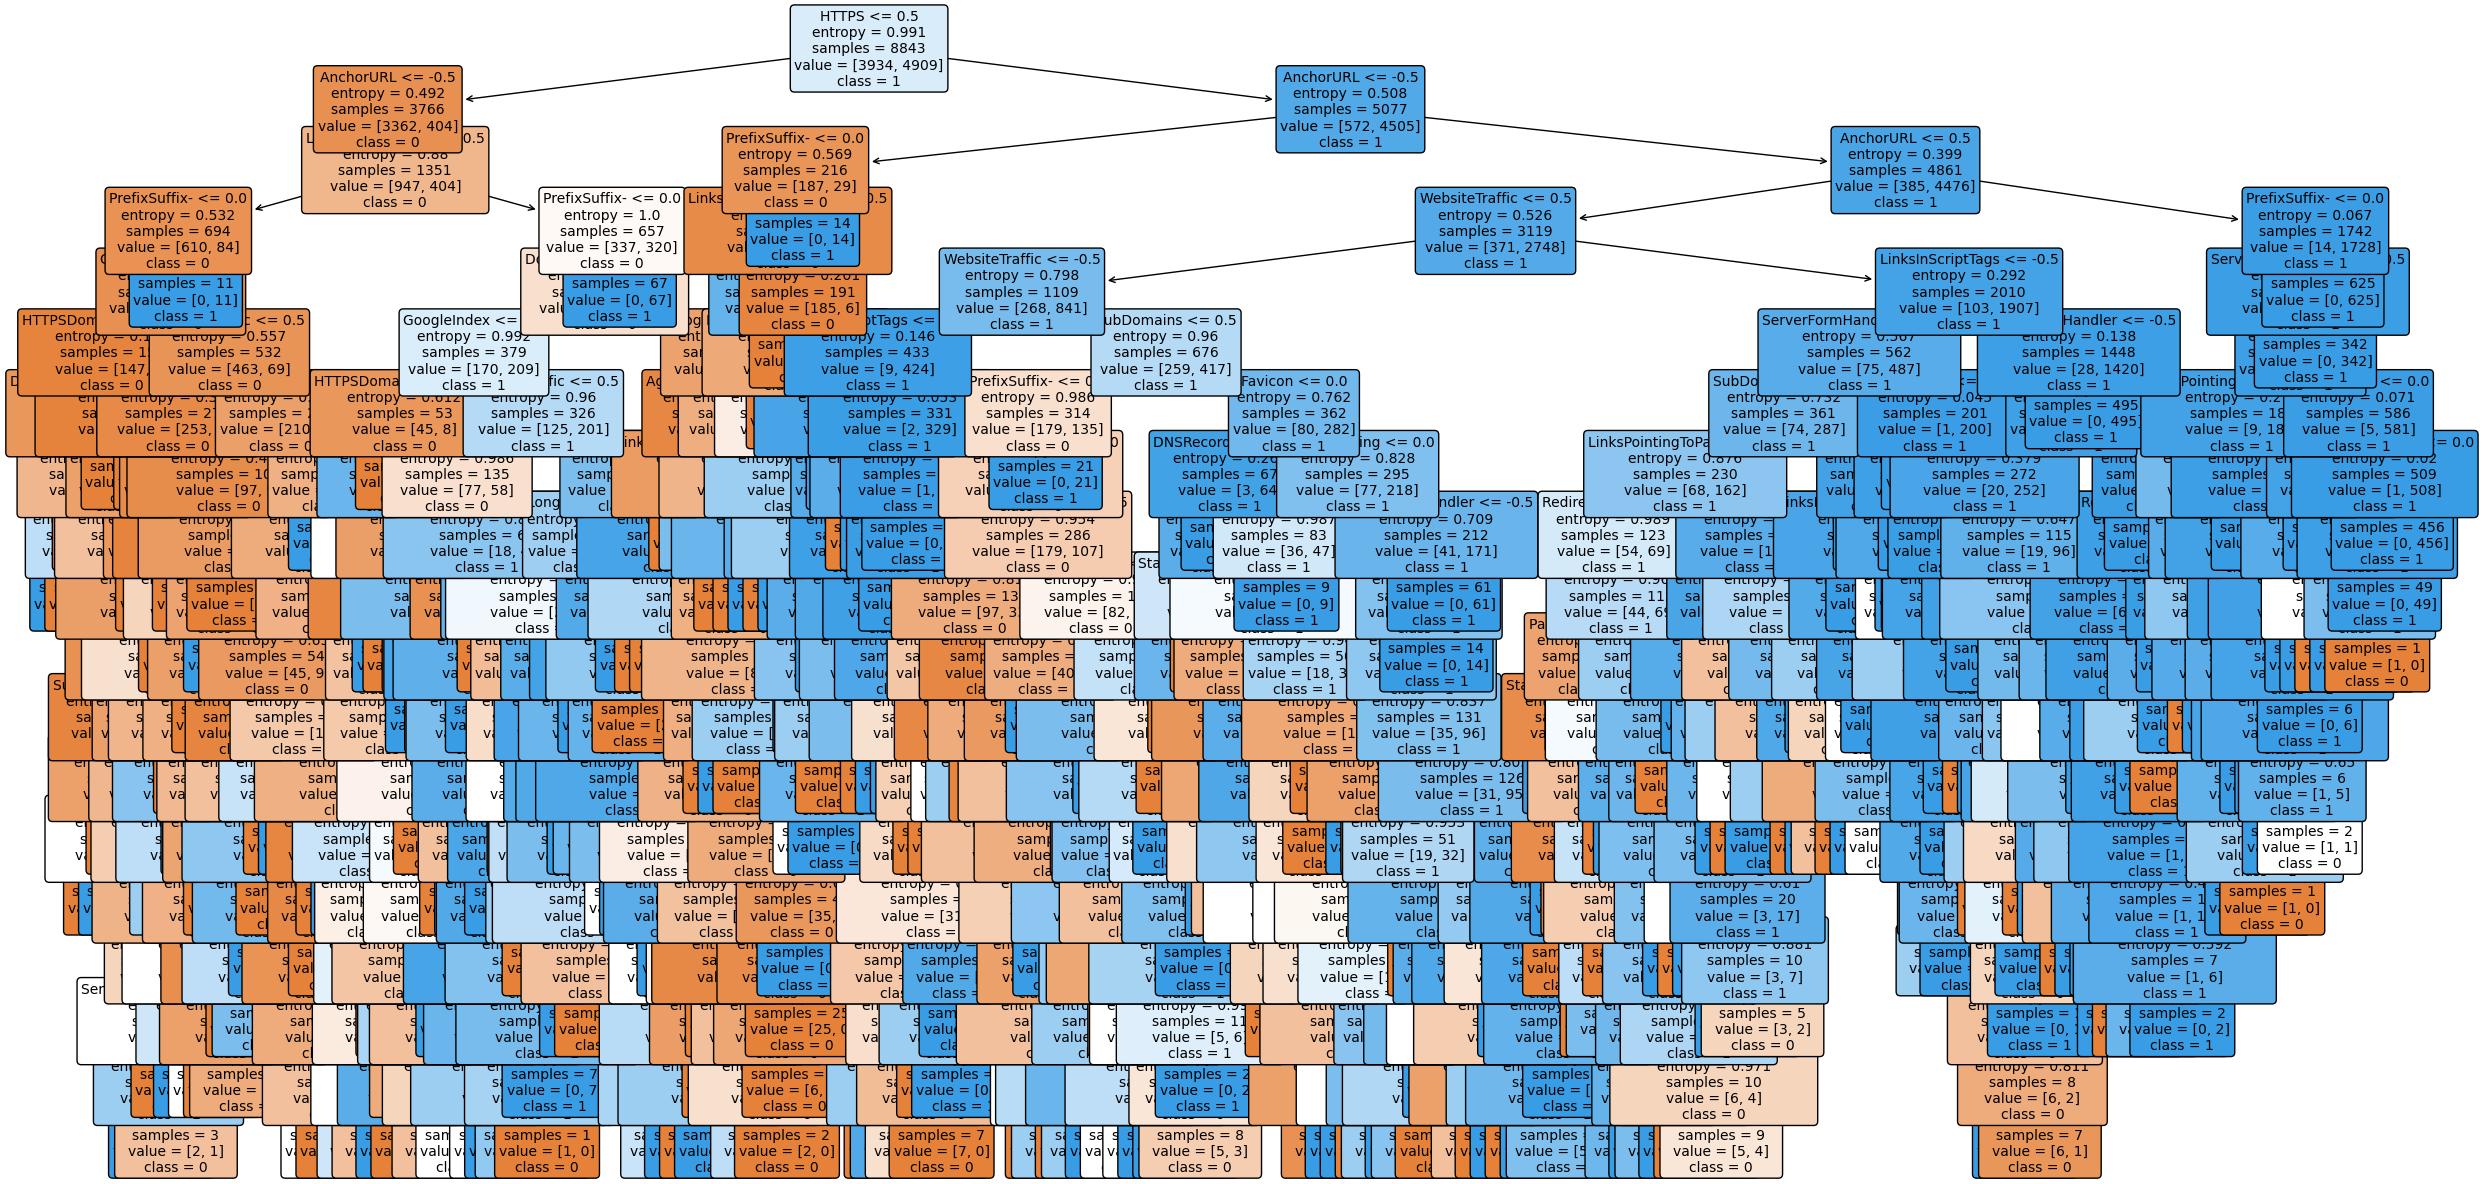

In [44]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Assuming DT_modelcv is your Decision Tree model obtained from GridSearchCV
feature_names = list(X.columns)
target_names = ["0", "1", "2", "3"]

# Create a figure and plot the decision tree
plt.figure(figsize=(30, 15))
plot_tree(DT_modelcv, filled=True, feature_names=feature_names, class_names=target_names, rounded=True, fontsize=10)

# Display the plot
plt.show()


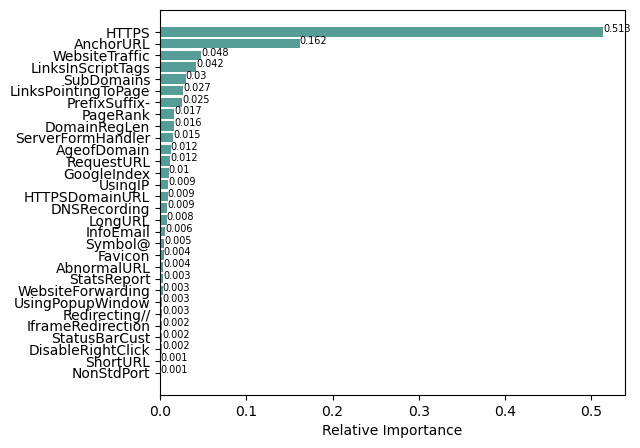

In [45]:
# Get feature importances from the Random Forest model
importances = DT_modelcv.feature_importances_

# Sort the features by importance
indices = np.argsort(importances)

# Create a horizontal bar plot of the feature importances
plt.figure(figsize=(6, 5))
plt.barh(range(len(indices)), importances[indices], color='#559d96', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')

# Add labels to the bars
for i, v in enumerate(importances[indices]):
    plt.text(v, i, str(round(v, 3)), color='black', fontsize= 7)

plt.show()

In [46]:
# Create a decision tree classifier
clf = DecisionTreeClassifier()

# Generate the cost complexity pruning path for the decision tree using the training data
path = clf.cost_complexity_pruning_path(X_train1, y_train1)

# Extract the list of alphas and impurities from the pruning path
ccp_alphas = path.ccp_alphas
impurities = path.impurities

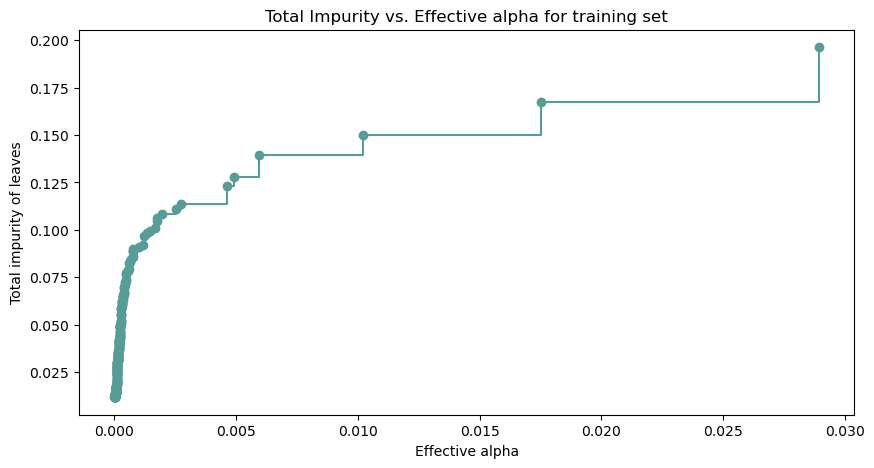

In [47]:
# Create a figure and axis object for the plot
fig, ax = plt.subplots(figsize=(10,5))

# Plot the total impurity vs. effective alpha using a step plot
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', color='#559d96', drawstyle="steps-post")

# Set the x and y labels and title for the plot
ax.set_xlabel("Effective alpha")
ax.set_ylabel("Total impurity of leaves")
ax.set_title("Total Impurity vs. Effective alpha for training set")

# Show the plot
plt.show()

In [48]:
from sklearn import metrics
# Initialize empty lists to store classifier objects and evaluation metrics
clfs = []
accuracy_train = []
accuracy_test = []
recall_train = []
recall_test = []

# Loop through the values of ccp_alpha
for ccp_alpha in ccp_alphas:
    # Create a decision tree classifier object with the given value of ccp_alpha
    clf = DecisionTreeClassifier(ccp_alpha=ccp_alpha)
    
    # Fit the classifier to the training data
    clf.fit(X_train1, y_train1)
    
    # Generate predictions for the training and test sets
    y_train_pred = clf.predict(X_train1)
    y_test_pred = clf.predict(X_test1)
    
    # Compute and store the accuracy scores for the training and test sets
    accuracy_train.append(clf.score(X_train1, y_train1))
    accuracy_test.append(clf.score(X_test1, y_test1))
    
    # Compute and store the recall scores for the training and test sets
    recall_train.append(metrics.recall_score(y_train1, y_train_pred, average='micro'))
    recall_test.append(metrics.recall_score(y_test1, y_test_pred, average='micro'))
    
    # Store the classifier object in the list of classifiers
    clfs.append(clf)

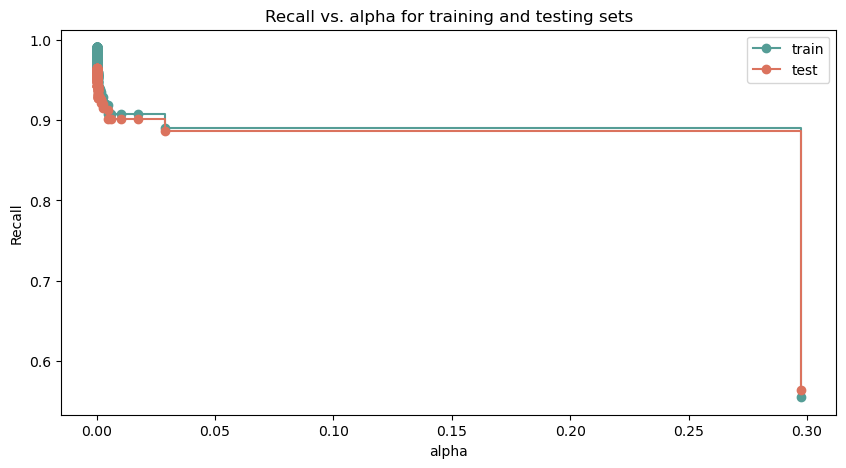

In [49]:
fig, ax = plt.subplots(figsize=(10, 5))

# Set the x-axis and y-axis label to "alpha" and "Recall"
ax.set_xlabel("alpha")
ax.set_ylabel("Recall")

# Set the title of the plot
ax.set_title("Recall vs. alpha for training and testing sets")

# Plot the recall scores for the training and test set as a function of ccp_alpha
ax.plot(ccp_alphas, recall_train, marker='o', label="train", drawstyle="steps-post", color='#559d96')
ax.plot(ccp_alphas, recall_test, marker='o', label="test", drawstyle="steps-post", color='#db735e')

# legend
ax.legend()
plt.show()

In [50]:
DT_Pruning = DecisionTreeClassifier(ccp_alpha= 0.0027, criterion= 'entropy', max_depth= 10)
DT_Pruning.fit(X_train1, y_train1)

DecisionTreeClassifier(ccp_alpha=0.0027, criterion='entropy', max_depth=10)

In [51]:
y_pred = DT_Pruning.predict(X_test1)

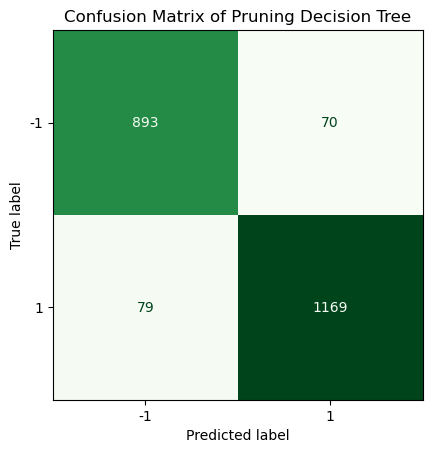

In [52]:
ConfusionMatrixDisplay.from_estimator(DT_Pruning, X_test1, y_test1, colorbar=False, cmap='Greens')
plt.title('Confusion Matrix of Pruning Decision Tree')
plt.grid(False)

In [53]:
DT_Pruning_result = metrics_calculator(y_test1, y_pred, 'Post-pruning Decision Tree')
DT_Pruning_result

,Post-pruning Decision Tree
Accuracy,0.932610
Precision,0.931114
Recall,0.932005
F1-score,0.931543


C:\Users\spurt\anaconda3\Lib\site-packages\sklearn\metrics\_ranking.py:1132: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


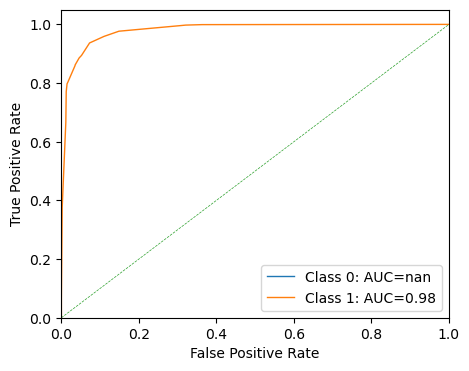

In [54]:
y_Pred_prob = DT_Pruning.predict_proba(X_test1)

def roc_curve_plot(y_actual, y_predicted_probs, figsize=(5, 4), title=None, legend_loc='best'):

    # Compute ROC curve and ROC area for each class
    fpr = {}
    tpr = {}
    thres = {}
    roc_auc = {}

    n_class = y_predicted_probs.shape[1]
    for i in range(n_class):
        fpr[i], tpr[i], thres[i] = roc_curve(y_actual == i, y_predicted_probs[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Create a figure and plot the ROC curve for each class
    plt.figure(figsize=figsize)
    for i in range(n_class):
        plt.plot(fpr[i], tpr[i], linewidth=1, label='Class {}: AUC={:.2f}'.format(i, roc_auc[i]))

    # Add diagonal line and axis labels
    plt.plot([0, 1], [0, 1], '--', linewidth=0.5)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

    # Set axis limits and add title and legend
    plt.xlim([0, 1])
    plt.ylim([0, 1.05])
    if title is not None:
        plt.title(title)
    plt.legend(loc=legend_loc)

    # Show the plot
    plt.show()
        
roc_curve_plot(y_test1, y_Pred_prob)

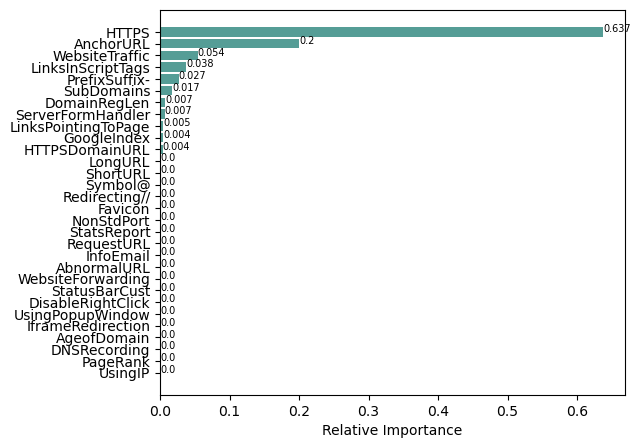

In [55]:
# Get feature importances from the Random Forest model
importances = DT_Pruning.feature_importances_

# Sort the features by importance
indices = np.argsort(importances)

# Create a horizontal bar plot of the feature importances
plt.figure(figsize=(6, 5))
plt.barh(range(len(indices)), importances[indices], color='#559d96', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')

# Add labels to the bars
for i, v in enumerate(importances[indices]):
    plt.text(v, i, str(round(v, 3)), color='black', fontsize= 7)

plt.show()


In [56]:
Conclusion = pd.concat([BaseDT_result, TunedDT_result, DT_Pruning_result], axis=1)
Conclusion

,Base Decision Tree,Tuned Decision Tree,Post-pruning Decision Tree
Accuracy,0.903211,0.958390,0.932610
Precision,0.900699,0.957496,0.931114
Recall,0.903829,0.957924,0.932005
F1-score,0.901988,0.957707,0.931543


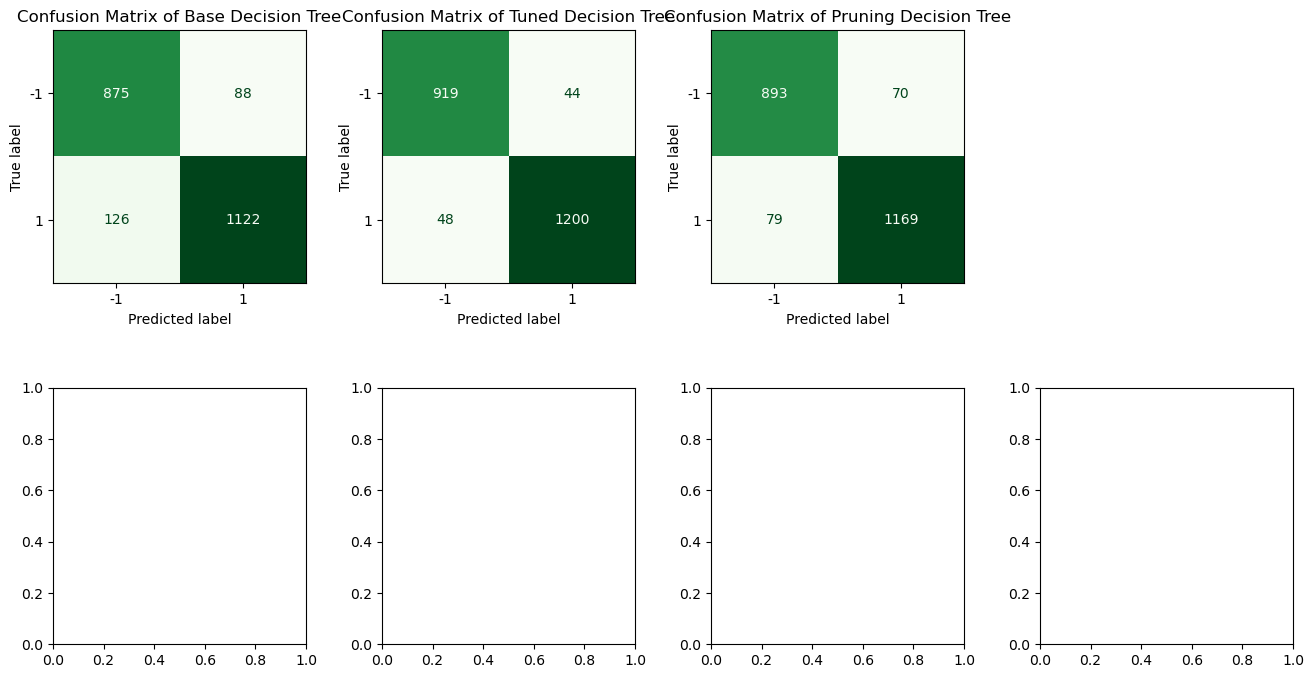

In [57]:
# Create subplots with 2 rows and 4 columns
fig, axs = plt.subplots(nrows=2, ncols=4, figsize=(16,8))

# Plot confusion matrix for Base Decision Tree
ax = axs[0, 0]
disp = ConfusionMatrixDisplay.from_estimator(DT_model, X_test1, y_test1, colorbar=False, cmap='Greens', ax=ax)
disp.ax_.set_title('Confusion Matrix of Base Decision Tree')
disp.ax_.grid(False)

# Plot confusion matrix for Tuned Decision Tree
ax = axs[0, 1]
disp = ConfusionMatrixDisplay.from_estimator(DT_modelcv, X_test1, y_test1, colorbar=False, cmap='Greens', ax=ax)
disp.ax_.set_title('Confusion Matrix of Tuned Decision Tree')
disp.ax_.grid(False)

# Plot confusion matrix for Pruning Decision Tree
ax = axs[0, 2]
disp = ConfusionMatrixDisplay.from_estimator(DT_Pruning, X_test1, y_test1, colorbar=False, cmap='Greens', ax=ax)
disp.ax_.set_title('Confusion Matrix of Pruning Decision Tree')
disp.ax_.grid(False)

# Hide the last subplot
axs[0,3].axis('off')

# Adjust spacing between subplots
plt.subplots_adjust(hspace=0.4, wspace=0.3)

plt.show()

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 12)

In [59]:
print('X_train shape: ', X_train.shape)
print('X_test shape: ', X_test.shape)
print('y_train shape: ', y_train.shape)
print('y_test shape: ', y_test.shape)

X_train shape:  (8843, 30)
X_test shape:  (2211, 30)
y_train shape:  (8843,)
y_test shape:  (2211,)


In [60]:
from sklearn.preprocessing import StandardScaler
# Scale the features using StandardScaler
scaler = StandardScaler()

# Fit the scaler to the training data and transform it
X_train = scaler.fit_transform(X_train)

# Transform the test data using the same scaler
X_test = scaler.transform(X_test)

In [61]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import GridSearchCV

# Define the base estimator with the desired criterion
base_estimator = DecisionTreeClassifier(criterion='gini')  # Change 'gini' to your desired criterion

# Define the BaggingClassifier with the base estimator
bagging_model = BaggingClassifier(estimator=base_estimator, random_state=0)

# Define the parameter grid for the grid search
param_grid = {
    'n_estimators': [10, 50, 100],
    'max_samples': [0.5, 1.0],
    'max_features': [0.5, 1.0],
}

# Perform grid search
grid_search = GridSearchCV(bagging_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best BaggingClassifier
best_bagging_model = grid_search.best_estimator_



In [62]:
from sklearn.model_selection import cross_val_score
# Fit the best BaggingClassifier model on the training set
best_bagging_model.fit(X_train, y_train)

# Make predictions on the test set
predictions3 = best_bagging_model.predict(X_test)

# Now you can proceed with evaluating the model or performing other tasks

accuracy = metrics.accuracy_score(predictions3, y_test)
print('Accuracy of the Bagged Decision Tree Model on the test set:', accuracy)

# calculate and print the mean cross-validated score of the bagging model
cross_val_scores = cross_val_score(best_bagging_model, X_train, y_train, cv=10, scoring='accuracy')
print('Cross-validated Score of the Bagged Decision Tree Model:', cross_val_scores.mean())

Accuracy of the Bagged Decision Tree Model on the test set: 0.9687924016282226
Cross-validated Score of the Bagged Decision Tree Model: 0.9690133445816397


In [63]:
Bagged_DecisionTree_result = metrics_calculator(y_test, predictions3, 'Tuned Bagged Decision Tree')
Bagged_DecisionTree_result

,Tuned Bagged Decision Tree
Accuracy,0.968792
Precision,0.968317
Recall,0.968206
F1-score,0.968261


In [64]:
# Tuned Voting Classifier
y_pred_tuned_ensemble = best_bagging_model.predict(X_test)

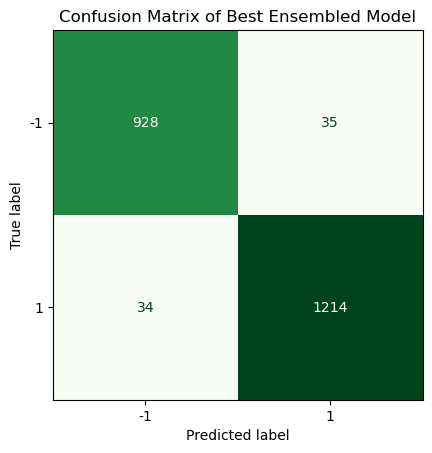

In [65]:
# Tuned Voting Classifier
ConfusionMatrixDisplay.from_estimator(best_bagging_model, X_test, y_test, colorbar=False, cmap='Greens')
plt.title('Confusion Matrix of Best Ensembled Model')
plt.grid(False)

In [66]:
# Tuned Voting Classifier
print(classification_report(y_test, y_pred_tuned_ensemble))

              precision    recall  f1-score   support

          -1       0.96      0.96      0.96       963
           1       0.97      0.97      0.97      1248

    accuracy                           0.97      2211
   macro avg       0.97      0.97      0.97      2211
weighted avg       0.97      0.97      0.97      2211



C:\Users\spurt\anaconda3\Lib\site-packages\sklearn\metrics\_ranking.py:1132: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


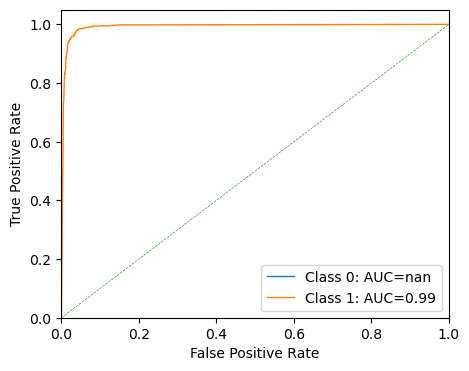

In [67]:
# Tuned Voting Classifier
y_Pred_prob = best_bagging_model.predict_proba(X_test)

def roc_curve_plot(y_actual, y_predicted_probs, figsize=(5, 4), title=None, legend_loc='best'):

    # Compute ROC curve and ROC area for each class
    fpr = {}
    tpr = {}
    thres = {}
    roc_auc = {}

    n_class = y_predicted_probs.shape[1]
    for i in range(n_class):
        fpr[i], tpr[i], thres[i] = roc_curve(y_actual == i, y_predicted_probs[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Create a figure and plot the ROC curve for each class
    plt.figure(figsize=figsize)
    for i in range(n_class):
        plt.plot(fpr[i], tpr[i], linewidth=1, label='Class {}: AUC={:.2f}'.format(i, roc_auc[i]))

    # Add diagonal line and axis labels
    plt.plot([0, 1], [0, 1], '--', linewidth=0.5)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

    # Set axis limits and add title and legend
    plt.xlim([0, 1])
    plt.ylim([0, 1.05])
    if title is not None:
        plt.title(title)
    plt.legend(loc=legend_loc)

    # Show the plot
    plt.show()
        
roc_curve_plot(y_test, y_Pred_prob)

In [68]:
import pickle
filename = 'model.pkl'
pickle.dump(best_bagging_model, open(filename,'wb'))

In [69]:
load_model=pickle.load(open(filename, 'rb'))
load_model

BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=50,
                  random_state=0)